### Import libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

In [2]:
df_original = pd.read_csv('UCI_Credit_Card.csv')

In [3]:
df = df_original.copy()

### Inspect Data

In [4]:
df.shape

(30000, 25)

In [5]:
df.dtypes

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

In [6]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [7]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### Handle missing values

In [8]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

No missing values were found

### Handle outliers

In [9]:
# Function to detect outliers using IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

# Check outliers in key columns
numerical_features = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 
                      'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                      'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 
                      'PAY_AMT5', 'PAY_AMT6']

for col in numerical_features:
    n_outliers, lower, upper = detect_outliers_iqr(df, col)
    print(f"{col}: {n_outliers} outliers ({n_outliers/len(df)*100:.2f}%)")

print()

# Cap outliers at 1st and 99th percentile for bill and payment amounts
bill_payment_cols = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 
                     'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 
                     'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

for col in bill_payment_cols:
    lower_bound = df[col].quantile(0.01)
    upper_bound = df[col].quantile(0.99)
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    print(f"Capped {col} at [{lower_bound:.2f}, {upper_bound:.2f}]")

# Remove clearly erroneous values (e.g., invalid ages)
print(f"\nRecords before age filtering: {len(df)}")
df = df[(df['AGE'] >= 18) & (df['AGE'] <= 100)]
print(f"Records after age filtering: {len(df)}")

LIMIT_BAL: 167 outliers (0.56%)
AGE: 272 outliers (0.91%)
BILL_AMT1: 2400 outliers (8.00%)
BILL_AMT2: 2395 outliers (7.98%)
BILL_AMT3: 2469 outliers (8.23%)
BILL_AMT4: 2622 outliers (8.74%)
BILL_AMT5: 2725 outliers (9.08%)
BILL_AMT6: 2693 outliers (8.98%)
PAY_AMT1: 2745 outliers (9.15%)
PAY_AMT2: 2714 outliers (9.05%)
PAY_AMT3: 2598 outliers (8.66%)
PAY_AMT4: 2994 outliers (9.98%)
PAY_AMT5: 2945 outliers (9.82%)
PAY_AMT6: 2958 outliers (9.86%)

Capped BILL_AMT1 at [-81.00, 350110.68]
Capped BILL_AMT2 at [-200.00, 337495.28]
Capped BILL_AMT3 at [-200.00, 325030.39]
Capped BILL_AMT4 at [-212.02, 304997.27]
Capped BILL_AMT5 at [-232.01, 285868.33]
Capped BILL_AMT6 at [-331.03, 279505.06]
Capped PAY_AMT1 at [0.00, 66522.18]
Capped PAY_AMT2 at [0.00, 76651.02]
Capped PAY_AMT3 at [0.00, 70000.00]
Capped PAY_AMT4 at [0.00, 67054.44]
Capped PAY_AMT5 at [0.00, 65607.56]
Capped PAY_AMT6 at [0.00, 82619.05]

Records before age filtering: 30000
Records after age filtering: 30000


### Clean categorical variables

In [10]:
# Check current distribution of categorical variables
print("EDUCATION distribution (before cleaning):")
print(df['EDUCATION'].value_counts().sort_index())

print("\nMARRIAGE distribution (before cleaning):")
print(df['MARRIAGE'].value_counts().sort_index())

print("\nSEX distribution:")
print(df['SEX'].value_counts().sort_index())

# Clean EDUCATION: recode 0, 5, 6 as 4 (others)
df['EDUCATION'] = df['EDUCATION'].replace({0: 4, 5: 4, 6: 4})
print("\nEDUCATION distribution (after cleaning):")
print(df['EDUCATION'].value_counts().sort_index())

# Clean MARRIAGE: recode 0 as 3 (others)
df['MARRIAGE'] = df['MARRIAGE'].replace({0: 3})
print("\nMARRIAGE distribution (after cleaning):")
print(df['MARRIAGE'].value_counts().sort_index())

# Verify SEX values
print(f"\nSEX unique values: {sorted(df['SEX'].unique())}")
assert df['SEX'].isin([1, 2]).all(), "Invalid SEX values found"
print("✓ SEX values are valid (1 or 2)")

# Validate payment status variables
pay_cols = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
print("\nPayment status ranges:")
for col in pay_cols:
    print(f"{col}: min={df[col].min()}, max={df[col].max()}, unique values={len(df[col].unique())}")

EDUCATION distribution (before cleaning):
EDUCATION
0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: count, dtype: int64

MARRIAGE distribution (before cleaning):
MARRIAGE
0       54
1    13659
2    15964
3      323
Name: count, dtype: int64

SEX distribution:
SEX
1    11888
2    18112
Name: count, dtype: int64

EDUCATION distribution (after cleaning):
EDUCATION
1    10585
2    14030
3     4917
4      468
Name: count, dtype: int64

MARRIAGE distribution (after cleaning):
MARRIAGE
1    13659
2    15964
3      377
Name: count, dtype: int64

SEX unique values: [np.int64(1), np.int64(2)]
✓ SEX values are valid (1 or 2)

Payment status ranges:
PAY_0: min=-2, max=8, unique values=11
PAY_2: min=-2, max=8, unique values=11
PAY_3: min=-2, max=8, unique values=11
PAY_4: min=-2, max=8, unique values=11
PAY_5: min=-2, max=8, unique values=10
PAY_6: min=-2, max=8, unique values=10


### Feature engineering

In [11]:
# Create Gender-Marriage combined feature
def create_gender_marriage_category(row):
    sex = row['SEX']
    marriage = row['MARRIAGE']
    
    if sex == 1:  # Male
        if marriage == 1:
            return 1  # Married man
        elif marriage == 2:
            return 2  # Single man
        else:  # marriage == 3 (others/divorced)
            return 3  # Divorced man
    else:  # Female (sex == 2)
        if marriage == 1:
            return 4  # Married woman
        elif marriage == 2:
            return 5  # Single woman
        else:  # marriage == 3 (others/divorced)
            return 6  # Divorced woman

df['GENDER_MARRIAGE'] = df.apply(create_gender_marriage_category, axis=1)

print("Gender-Marriage category distribution:")
print(df['GENDER_MARRIAGE'].value_counts().sort_index())
print(f"\nCategory labels:")
print("1: Married man")
print("2: Single man")
print("3: Divorced man")
print("4: Married woman")
print("5: Single woman")
print("6: Divorced woman")

Gender-Marriage category distribution:
GENDER_MARRIAGE
1    5190
2    6553
3     145
4    8469
5    9411
6     232
Name: count, dtype: int64

Category labels:
1: Married man
2: Single man
3: Divorced man
4: Married woman
5: Single woman
6: Divorced woman


#### Exclude divorced women

In [12]:
# Count divorced women before exclusion
divorced_women_count = (df['GENDER_MARRIAGE'] == 6).sum()
print(f"\nDivorced women records: {divorced_women_count}")
print(f"Dataset size before exclusion: {len(df)}")

# Exclude divorced women (category 6)
df = df[df['GENDER_MARRIAGE'] != 6].copy()

print(f"Dataset size after exclusion: {len(df)}")
print(f"Records removed: {divorced_women_count}")

print("\nRemaining Gender-Marriage categories:")
print(df['GENDER_MARRIAGE'].value_counts().sort_index())


Divorced women records: 232
Dataset size before exclusion: 30000
Dataset size after exclusion: 29768
Records removed: 232

Remaining Gender-Marriage categories:
GENDER_MARRIAGE
1    5190
2    6553
3     145
4    8469
5    9411
Name: count, dtype: int64


#### UNPAID AMOUNT COLUMN 

直近の支払い後の実質的な残債を示す。この金額が大きいほど、財務的な負担が大きく、デフォルトリスクが高いと予測

In [13]:
df['UNPAID_AMT1'] = df['BILL_AMT1'] - df['PAY_AMT1']
print(f"Created UNPAID_AMT1 (Recent Net Unpaid Amount).")

Created UNPAID_AMT1 (Recent Net Unpaid Amount).


In [14]:
df["UNPAID_AMT1"]

0          3913.00
1          2682.00
2         27721.00
3         44990.00
4          6617.00
           ...    
29995    180448.00
29996      -154.00
29997      3565.00
29998    -66603.18
29999     45851.00
Name: UNPAID_AMT1, Length: 29768, dtype: float64

#### Credit Utilization Ratio

与信枠に対する直近の請求額の割合を示す。一般に、利用率が高い（与信枠を使い切っている）ほど、財務的に逼迫しており、デフォルトリスクが高いと予測

In [15]:
# ゼロ除算を避けるため、LIMIT_BALがゼロの場合は0を代入
df['UTILIZATION_RATIO1'] = np.where(df['LIMIT_BAL'] > 0, df['BILL_AMT1'] / df['LIMIT_BAL'], 0)
# 1.0より大きな値は、BILL_AMTがLIMIT_BALを超えている可能性を示します（例：利息や手数料）。
print(f"Created UTILIZATION_RATIO1 (Recent Credit Utilization Ratio).")

Created UTILIZATION_RATIO1 (Recent Credit Utilization Ratio).


In [16]:
df['UTILIZATION_RATIO1']

0        0.195650
1        0.022350
2        0.324878
3        0.939800
4        0.172340
           ...   
29995    0.858855
29996    0.011220
29997    0.118833
29998   -0.001012
29999    0.958580
Name: UTILIZATION_RATIO1, Length: 29768, dtype: float64

#### Payment Status Trend


直近（PAY_0）と6ヶ月前（PAY_6）の延滞ステータスの差。正の値であれば延滞状況が悪化している（返済能力が低下している）ことを示し、負の値であれば改善していることを示

In [17]:
df['PAY_STATUS_TREND'] = df['PAY_0'] - df['PAY_6']
print(f"Created PAY_STATUS_TREND (Delinquency Trend).")

Created PAY_STATUS_TREND (Delinquency Trend).


In [18]:
df['PAY_STATUS_TREND']

0        4
1       -3
2        0
3        0
4       -1
        ..
29995    0
29996   -1
29997    4
29998    2
29999    0
Name: PAY_STATUS_TREND, Length: 29768, dtype: int64

### Prepare features and target

In [19]:
# Remove ID column if it exists
if 'ID' in df.columns:
    df = df.drop('ID', axis=1)
    print("ID column removed")

# Define target variable
target_col = 'default.payment.next.month'

print(f"\nTarget variable: {target_col}")
print("Distribution:")
print(df[target_col].value_counts())
print(f"Default rate: {df[target_col].mean():.1%}")

# Separate features and target
y = df[target_col].copy()

# Define feature columns (all except target)
feature_cols = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
                'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 
                'BILL_AMT5', 'BILL_AMT6',
                'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 
                'PAY_AMT5', 'PAY_AMT6',
                'GENDER_MARRIAGE','UNPAID_AMT1','UTILIZATION_RATIO1','PAY_STATUS_TREND']

X = df[feature_cols].copy()

print(f"\nFeature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")
print(f"\nFeatures being used: {list(X.columns)}")

# Check for missing values
print(f"\nMissing values in features: {X.isnull().sum().sum()}")
print(f"Missing values in target: {y.isnull().sum()}")

ID column removed

Target variable: default.payment.next.month
Distribution:
default.payment.next.month
0    23179
1     6589
Name: count, dtype: int64
Default rate: 22.1%

Feature matrix shape: (29768, 27)
Target vector shape: (29768,)

Features being used: ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'GENDER_MARRIAGE', 'UNPAID_AMT1', 'UTILIZATION_RATIO1', 'PAY_STATUS_TREND']

Missing values in features: 0
Missing values in target: 0


### Train-test split

In [20]:
# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

print("=" * 50)
print("TRAIN-TEST SPLIT RESULTS")
print("=" * 50)

print(f"\nTraining set size: {X_train.shape[0]} ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Test set size: {X_test.shape[0]} ({X_test.shape[0]/len(X)*100:.1f}%)")

print(f"\nTraining set default rate: {y_train.mean():.3%}")
print(f"Test set default rate: {y_test.mean():.3%}")

# Verify stratification worked
print("\n" + "-" * 50)
print("Class Distribution Comparison")
print("-" * 50)
print("\nOriginal dataset:")
print(y.value_counts(normalize=True).sort_index())
print("\nTraining set:")
print(y_train.value_counts(normalize=True).sort_index())
print("\nTest set:")
print(y_test.value_counts(normalize=True).sort_index())

# Check if distributions are similar (difference should be < 1%)
train_default_rate = y_train.mean()
test_default_rate = y_test.mean()
overall_default_rate = y.mean()

diff_train = abs(train_default_rate - overall_default_rate)
diff_test = abs(test_default_rate - overall_default_rate)

if diff_train < 0.01 and diff_test < 0.01:
    print("\n✓ Stratification successful - distributions are similar")
else:
    print("\n⚠ Warning: Distributions differ more than expected")

TRAIN-TEST SPLIT RESULTS

Training set size: 20837 (70.0%)
Test set size: 8931 (30.0%)

Training set default rate: 22.134%
Test set default rate: 22.136%

--------------------------------------------------
Class Distribution Comparison
--------------------------------------------------

Original dataset:
default.payment.next.month
0    0.778655
1    0.221345
Name: proportion, dtype: float64

Training set:
default.payment.next.month
0    0.778663
1    0.221337
Name: proportion, dtype: float64

Test set:
default.payment.next.month
0    0.778636
1    0.221364
Name: proportion, dtype: float64

✓ Stratification successful - distributions are similar


### Train a model

#### Decision Tree model

In [21]:
# # Parameters for grid search
param_grid = {
    'max_depth': [3, 5, 7, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced'] + [{0: 1, 1: w} for w in [1, 2, 3, 5, 10]]
}

model = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(
    model, 
    param_grid, 
    cv=5, 
    scoring='f1',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

print(f"Best parameters: {grid_search.best_params_}")
print(f"\nPerformance Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"Recall: {recall_score(y_test, y_pred):.3f}")
print(f"F1-score: {f1_score(y_test, y_pred):.3f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba):.3f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No Default', 'Default']))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Export the best model
joblib.dump(best_model, '../models/best_decision_tree_model.pkl')
print("\n✓ Best model saved as 'best_decision_tree_model.pkl'")

In [22]:
# 特徴量重要度を取得
importance = best_model.feature_importances_

# 見やすく表示
pd.DataFrame({
    'Feature': feature_cols,
    'Importance': importance
}).sort_values('Importance', ascending=False)

#### Logistic Regression model


LOGISTIC REGRESSION MODEL

Best parameters found:
{'C': 1, 'penalty': 'l1'}

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.70      0.78      6954
           1       0.38      0.64      0.48      1977

    accuracy                           0.69      8931
   macro avg       0.63      0.67      0.63      8931
weighted avg       0.76      0.69      0.71      8931


Confusion Matrix:
[[4877 2077]
 [ 709 1268]]

ROC-AUC Score: 0.7250


<Figure size 800x600 with 0 Axes>

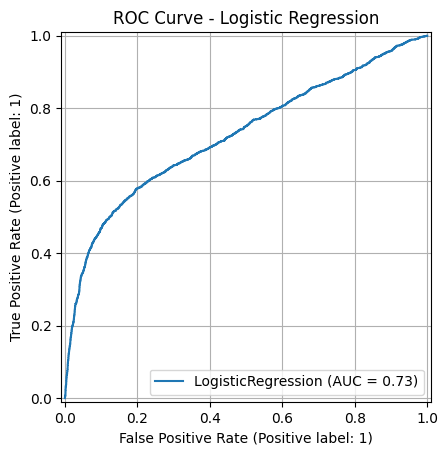

In [23]:
# ==============================================
# Step 8: Logistic Regression モデルの学習
# ==============================================
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

print("\n" + "="*60)
print("LOGISTIC REGRESSION MODEL")
print("="*60)

# ----------------------------------------------
# 1. モデル定義
# ----------------------------------------------
log_reg = LogisticRegression(
    class_weight='balanced',   
    solver='liblinear',       
    max_iter=1000
)

# ----------------------------------------------
# 2. ハイパーパラメータ探索（任意）
# ----------------------------------------------
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],   # 正則化
    'penalty': ['l1', 'l2']
}

grid = GridSearchCV(
    log_reg,
    param_grid,
    cv=5,
    scoring='roc_auc',    # 不均衡データでは AUC が最適
    n_jobs=-1,
    verbose=0
)

grid.fit(X_train, y_train)

print("\nBest parameters found:")
print(grid.best_params_)

# 最良モデルで予測
best_log_reg = grid.best_estimator_
y_pred = best_log_reg.predict(X_test)
y_proba = best_log_reg.predict_proba(X_test)[:, 1]

# ----------------------------------------------
# 3. 評価指標
# ----------------------------------------------

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

auc = roc_auc_score(y_test, y_proba)
print(f"\nROC-AUC Score: {auc:.4f}")

# ----------------------------------------------
# 4. ROC曲線の描画
# ----------------------------------------------
plt.figure(figsize=(8, 6))
RocCurveDisplay.from_estimator(best_log_reg, X_test, y_test)
plt.title("ROC Curve - Logistic Regression")
plt.grid(True)
plt.show()


In [24]:
# ==============================================
# Step 9: 複数モデルの学習・評価比較
# ==============================================
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from lightgbm import LGBMClassifier

# モデル定義
models = {
    "Logistic Regression": LogisticRegression(
        class_weight='balanced', solver='liblinear', max_iter=1000
    ),
    "Random Forest": RandomForestClassifier(
        n_estimators=200, class_weight='balanced', random_state=42
    ),
    "SVM": SVC(
        class_weight='balanced', probability=True, kernel='rbf', random_state=42
    ),
    "XGBoost": xgb.XGBClassifier(
        n_estimators=200, use_label_encoder=False, eval_metric='logloss', random_state=42
    ),
    "LightGBM": LGBMClassifier(
        n_estimators=200, learning_rate=0.1, max_depth=-1, class_weight='balanced', random_state=42
    )
}

# 結果格納用
results = []

for name, model in models.items():
    print(f"\n{'='*50}\nTraining and evaluating: {name}\n{'='*50}")
    # 学習
    model.fit(X_train, y_train)
    
    # 予測
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    
    # 評価
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    
    print(f"Accuracy: {acc:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC-AUC: {auc:.4f}")
    
    # 結果格納
    results.append({
        "Model": name,
        "Accuracy": acc,
        "F1 Score": f1,
        "ROC-AUC": auc
    })

# 結果の比較表
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="ROC-AUC", ascending=False).reset_index(drop=True)

print("\n\n=== Model Comparison Table ===")
print(results_df)


Training and evaluating: Logistic Regression
Accuracy: 0.6792
F1 Score: 0.4640
ROC-AUC: 0.7172

Training and evaluating: Random Forest
Accuracy: 0.8156
F1 Score: 0.4515
ROC-AUC: 0.7660

Training and evaluating: SVM
Accuracy: 0.5757
F1 Score: 0.4060
ROC-AUC: 0.6536

Training and evaluating: XGBoost


C:\Users\image\anaconda3\envs\ds_301_mid_project\Lib\site-packages\xgboost\training.py:199: UserWarning: [17:38:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.8048
F1 Score: 0.4486
ROC-AUC: 0.7458

Training and evaluating: LightGBM
[LightGBM] [Info] Number of positive: 4612, number of negative: 16225
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002005 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3788
[LightGBM] [Info] Number of data points in the train set: 20837, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Accuracy: 0.7690
F1 Score: 0.5406
ROC-AUC: 0.7764


=== Model Comparison Table ===
                 Model  Accuracy  F1 Score   ROC-AUC
0             LightGBM  0.769007  0.540637  0.776418
1        Random Forest  0.815586  0.451548  0.766039
2              XGBoost  0.804837  0.448592  0.745814
3  Logistic Regression  0.679207  0.463985  0.717246
4         

特徴量('UNPAID_AMT1','UTILIZATION_RATIO1','PAY_STATUS_TREND')追加前

| Model               | Accuracy | F1 Score | ROC-AUC | 分析                                                              |
| ------------------- | -------- | -------- | ------- | ----------------------------------------------------------------- |
| LightGBM            | 0.77     | 0.54     | 0.775   | AccuracyはRFより少し低いが、F1とROC-AUCが高く、少数クラス（デフォルト）の予測性能が良い。総合的な判別力も高い。 |
| Random Forest       | 0.81     | 0.44     | 0.768   | Accuracyは高いが、F1が低く、少数クラスの予測が弱い。過半数クラス（非デフォルト）を中心に正解している可能性が高い。    |
| XGBoost             | 0.81     | 0.45     | 0.748   | Accuracyは高いがROC-AUCがやや低く、少数クラスに対する判別力はLightGBMより劣る。               |
| Logistic Regression | 0.67     | 0.46     | 0.72    | シンプルモデルで少数クラスにそこそこ対応しているが、木系モデルには劣る。                              |
| SVM                 | 0.58     | 0.41     | 0.65    | 全体的に性能が低い。少数クラスの予測も弱い。                                            |


特徴量('UNPAID_AMT1','UTILIZATION_RATIO1','PAY_STATUS_TREND')追加後

| Model               | Accuracy | F1 Score | ROC-AUC | 分析                                                               |
| ------------------- | -------- | -------- | ------- | ------------------------------------------------------------------ |
| LightGBM            | 0.769    | 0.541    | 0.776   | AccuracyはRFより低いが、F1とROC-AUCが最も高い。少数クラス（デフォルト）の予測が優れており、総合的な判別力も高い。 |
| Random Forest       | 0.816    | 0.452    | 0.766   | Accuracyは最も高いが、F1が低めで少数クラスへの対応はLightGBMより劣る。                       |
| XGBoost             | 0.805    | 0.449    | 0.746   | Accuracyは高めだが、ROC-AUCが低く、少数クラスへの判別能力はさらに劣る。                        |
| Logistic Regression | 0.679    | 0.464    | 0.717   | シンプルモデルとして少数クラスもある程度扱えるが、木系モデルには劣る。                                |
| SVM                 | 0.576    | 0.406    | 0.654   | 全体的に性能が低く、少数クラスも苦手。                                                |


🔹 解釈

・今回のデータはクラス不均衡（デフォルト22%、非デフォルト78%）

・Accuracyだけでは少数クラスの性能を評価できない

・F1スコアとROC-AUCの両方が高いLightGBMは、少数クラスも含めて全体的にバランス良く分類できる

・総合的な分類能力（ROC-AUC）も最も高い → 最適なモデル候補と判断できる